How to run this program:

1. First we have to ensure that dataset is in our google drive, dataset download link is  "https://drive.google.com/drive/folders/1iBmeYCsizh-pMBjH0ovC0MEXUfvd19Qr?usp=sharing" or "https://drive.google.com/open?id=1iBmeYCsizh-pMBjH0ovC0MEXUfvd19Qr" then upload it in our drive

2. Then we have to mount our google drive where our dataset we uploaded.

3. Then we have to press shift+enter for each cell bellow for running the code.

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries and packages

import numpy as np # linear algebra
import os

from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

from tensorflow.keras import optimizers


**Crete Data Generators to preprocess and prepare training and validation**

In [ ]:

from os import listdir
data_list = listdir('/content/drive/My Drive/covid-19/four_classes/train')
print(len(data_list))
DATASET_PATH  = '/content/drive/My Drive/covid-19/four_classes/train'
test_dir =  '/content/drive/My Drive/covid-19/four_classes/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 90
LEARNING_RATE =0.0001

#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True, #Set input mean to 0 over the dataset
                                   featurewise_std_normalization = True, #Divide inputs by std of the dataset
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25, #angle
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,  # Range for random channel shifts.
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2, # reserved for validation 
                                   fill_mode='constant') # how boundaries are fill with which pixels



# For multiclass use categorical n for binary use binary
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,            #suffling or teansformation
                                                  class_mode="categorical"   #For multiclass use categorical n for binary use binary
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"  #For multiclass use categorical n for binary use binary
                                                 
                                                  )

4


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 1119 images belonging to 4 classes.
Found 277 images belonging to 4 classes.


[[[148 148 148]
  [146 146 146]
  [145 145 145]
  ...
  [133 133 133]
  [133 133 133]
  [133 133 133]]

 [[ 42  42  42]
  [ 41  41  41]
  [ 39  39  39]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[ 49  49  49]
  [ 49  49  49]
  [ 47  47  47]
  ...
  [ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]]

 ...

 [[208 208 208]
  [212 212 212]
  [216 216 216]
  ...
  [202 202 202]
  [200 200 200]
  [199 199 199]]

 [[207 207 207]
  [212 212 212]
  [217 217 217]
  ...
  [203 203 203]
  [201 201 201]
  [200 200 200]]

 [[207 207 207]
  [212 212 212]
  [218 218 218]
  ...
  [203 203 203]
  [201 201 201]
  [200 200 200]]]


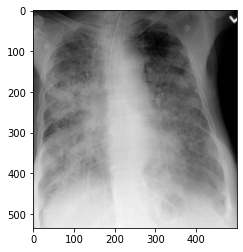

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/My Drive/covid-19/four_classes/train/covid/wong-0005.jpg')
print(img)
plt.imshow(img)
plt.show()


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


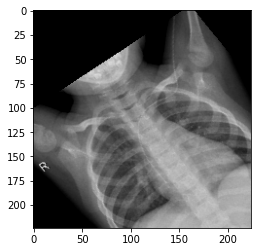

In [ ]:
plt.imshow(train_batches[0][0][0])
plt.show()

Create a new model or Use Pre trained CNN Model and modify according to the need. 

In [ ]:
#Simple CNN model based on Xception. Set dense layer neuron count same as the no. of output classes 
from tensorflow.keras.applications import Xception

conv_base = Xception(weights='imagenet',    # transfer learning
                  include_top=False,
                  input_shape=(224, 224, 3))


conv_base.trainable = True


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',     #for multiclass use categorical_crossentropy
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

83689472/83683744 [==============================] - 0s 0us/step


**Load an already saved model (If there is a trained model already saved on drive)**

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               51380736  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 72,374,572
Trainable params: 72,320,044
Non-trainable params: 54,528
_______________________________________

Training

In [ ]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,                        
                       )

112
28


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/90
111/111 [==============================] - 716s 6s/step - loss: 1.2665 - acc: 0.4651 - val_loss: 0.6973 - val_acc: 0.7370
Epoch 2/90
111/111 [==============================] - 67s 598ms/step - loss: 0.6231 - acc: 0.7723 - val_loss: 0.6314 - val_acc: 0.7889
Epoch 3/90
111/111 [==============================] - 67s 606ms/step - loss: 0.5150 - acc: 0.8041 - val_loss: 0.9487 - val_acc: 0.7185
Epoch 4/90
111/111 [==============================] - 67s 602ms/step - loss: 0.4217 - acc: 0.8591 - val_loss: 0.8224 - val_acc: 0.7333
Epoch 5/90
111/111 [==============================] - 67s 602ms/step - loss: 0.3836 - acc: 0.8552 - val_loss: 0.8168 - val_acc: 0.7815
Epoch 6/90
111/111 [==============================] - 67s 601ms/step - loss: 0.3306 - acc: 0.8866 - val_loss: 0.5850 - val_acc: 0.8296
Epoch 7/90
111/111 [==============================] - 67s 600ms/step - loss: 0.3712 - acc: 0.8656 - val_loss: 0.3944 - val_acc: 0.8481
Epoch 8/90
111/111 [==============================] - 67s

In [ ]:
#Save the trained model and copy to drive please active this code by remove otherwise skip this cell(#)

#model.save('4-class-Covid19-Mod-Xception.h5')
#!cp /content/"4-class-Covid19-Mod-Xception.h5" /content/drive/"My Drive"/"Colab Notebooks"


In [ ]:
# Please active this code if we want to load our saved model from our google drive otherwise skip this cell
#model=load_model('/content/drive/My Drive/Colab Notebooks/4-class-Covid19-Mod-Xception.h5')
#print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 1028      
Total params: 72,374,572
Trainable params: 72,320,044
Non-trainable params: 54,528
_____________________________________

Evaluation

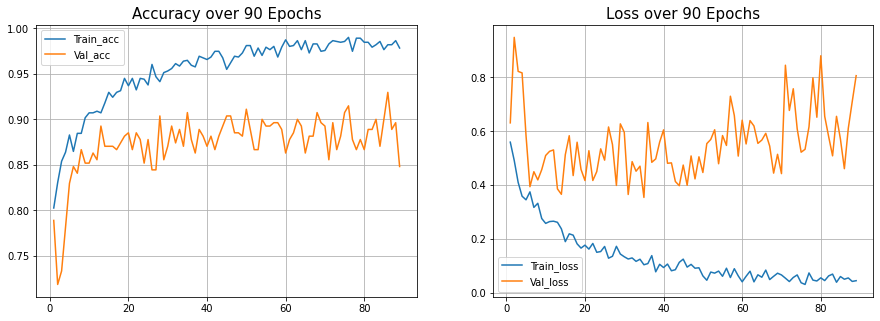

In [ ]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 90)

**Evaluate using evaluate Generator**

In [ ]:
# Create evaluate data generator from test set

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/drive/My Drive/covid-19/four_classes/test'
eval_generator = test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=1, 
                                                  shuffle=False, seed=42, class_mode="categorical")

Found 242 images belonging to 4 classes.


In [ ]:
#Evalute the trained model on evaluate generator
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator)), 
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1,
                           )
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

#Poor test accuracy due to the small dataset size

  4/242 [..............................] - ETA: 4s - loss: 1.6689e-06 - acc: 1.0000 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


242/242 [==============================] - 4s 17ms/step - loss: 1.3899 - acc: 0.8554
Test loss: 1.3899375200271606
Test accuracy: 0.85537189245224


### **`Predict Results using predict generator and evaluate the accuracy and Confusion matrix `**

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[19  0  0  1]
 [ 3 73  0  1]
 [ 0  4 68  3]
 [ 1  9 13 47]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.85      0.95      0.90        77
           2       0.84      0.91      0.87        75
           3       0.90      0.67      0.77        70

    accuracy                           0.86       242
   macro avg       0.85      0.87      0.86       242
weighted avg       0.86      0.86      0.85       242



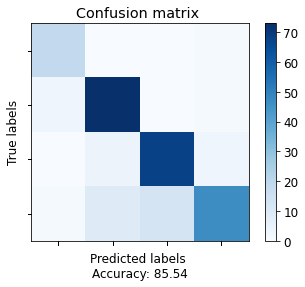

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

filenames = eval_generator.filenames
nb_samples = len(filenames)
eval_generator.reset()  
predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= eval_generator.classes[eval_generator.index_array]
acc=sum(predict==classes)/len(predict)
names=["covid","normal","pneumonia_bac","pneumonia_vir"]
#print(confusion_matrix(classes,predict))

font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels \nAccuracy: {:0.2f}'.format(acc*100))
plt.ylabel("True labels")
plt.xticks(classes, [])
plt.yticks(classes, [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

**Test Single image**

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


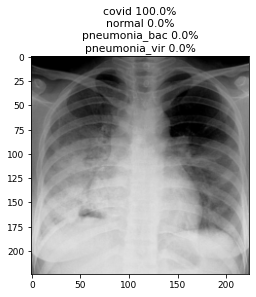

In [ ]:
import cv2
from skimage import transform

img_r = cv2.imread('/content/drive/My Drive/covid-19/four_classes/test/covid/wong-0003.jpg')

img1 = np.array(img_r).astype('float32')/255
img2 = transform.resize(img1, (224, 224, 3))

img = np.expand_dims(img2, axis=0)

r=model.predict(img)

index = np.argmax(r)


p=round(r.max()*100, 3)  #to find maximum score

scores=r


font = {
'family': 'Times New Roman',
'size': 9,

}
plt.rc('font', **font)

#plt.title(name +" ("+ str(p)+")")
plt.title(names[0] +" "+ str(round(scores[0][0]*100,1))+"%"+"\n"+names[1] +" "+ str(round(scores[0][1]*100,1))+"%"+"\n"+names[2] +" "+ str(round(scores[0][2]*100,1))+"%"+"\n"+names[3] +" "+ str(round(scores[0][3]*100,1))+"%")

plt.imshow(img2) 


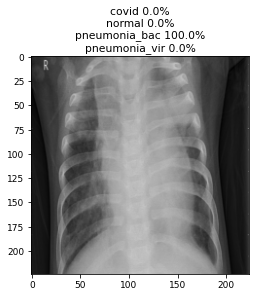

In [ ]:
import cv2
from skimage import transform
import matplotlib.pyplot as plt

img_r = cv2.imread('/content/drive/My Drive/covid-19/four_classes/test/pneumonia_bacterial/person175_bacteria_835.jpeg')


img1 = np.array(img_r).astype('float32')/255
img2 = transform.resize(img1, (224, 224, 3))

img = np.expand_dims(img2, axis=0)

r=model.predict(img)

index = np.argmax(r)


p=round(r.max()*100, 3)  #to find maximum score

scores=r
#print(scores)

font = {
'family': 'Times New Roman',
'size': 9,

}
plt.rc('font', **font)

#plt.title(name +" ("+ str(p)+")")
plt.title(names[0] +" "+ str(round(scores[0][0]*100,1))+"%"+"\n"+names[1] +" "+ str(round(scores[0][1]*100,1))+"%"+"\n"+names[2] +" "+ str(round(scores[0][2]*100,1))+"%"+"\n"+names[3] +" "+ str(round(scores[0][3]*100,1))+"%")

plt.imshow(img2) 


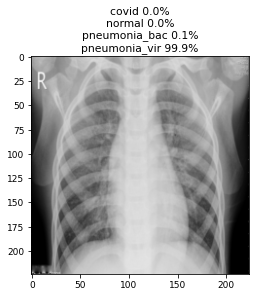

In [ ]:
import cv2
from skimage import transform
import matplotlib.pyplot as plt

img_r = cv2.imread('/content/drive/My Drive/covid-19/four_classes/test/pneumonia_viral/person1676_virus_2892.jpeg')


img1 = np.array(img_r).astype('float32')/255
img2 = transform.resize(img1, (224, 224, 3))

img = np.expand_dims(img2, axis=0)

r=model.predict(img)

index = np.argmax(r)


p=round(r.max()*100, 3)  #to find maximum score

scores=r
#print(scores)

font = {
'family': 'Times New Roman',
'size': 9,

}
plt.rc('font', **font)

#plt.title(name +" ("+ str(p)+")")
plt.title(names[0] +" "+ str(round(scores[0][0]*100,1))+"%"+"\n"+names[1] +" "+ str(round(scores[0][1]*100,1))+"%"+"\n"+names[2] +" "+ str(round(scores[0][2]*100,1))+"%"+"\n"+names[3] +" "+ str(round(scores[0][3]*100,1))+"%")

plt.imshow(img2) 


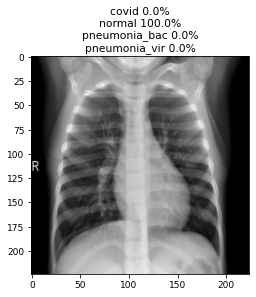

In [ ]:
import cv2
from skimage import transform
import matplotlib.pyplot as plt

img_r = cv2.imread('/content/drive/My Drive/covid-19/four_classes/test/normal/NORMAL2-IM-0374-0001.jpeg')


img1 = np.array(img_r).astype('float32')/255
img2 = transform.resize(img1, (224, 224, 3))

img = np.expand_dims(img2, axis=0)

r=model.predict(img)

index = np.argmax(r)


p=round(r.max()*100, 3)  #to find maximum score

scores=r
#print(scores)

font = {
'family': 'Times New Roman',
'size': 9,

}
plt.rc('font', **font)

#plt.title(name +" ("+ str(p)+")")
plt.title(names[0] +" "+ str(round(scores[0][0]*100,1))+"%"+"\n"+names[1] +" "+ str(round(scores[0][1]*100,1))+"%"+"\n"+names[2] +" "+ str(round(scores[0][2]*100,1))+"%"+"\n"+names[3] +" "+ str(round(scores[0][3]*100,1))+"%")

plt.imshow(img2) 
